### ファイル名入力

In [1]:
#file = "best_result_csv/re_best_results_august_r10_t20_review.csv"
file = "./updated_combined_data5.csv"

### ライブラリのインポート

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os
import math
import re
import ast
import matplotlib.pyplot as plt
# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

attractions = {
    0: 'ソアリン',
    1: 'トイストーリーマニア',
    2: 'タワーオブテラー',
    3: 'センターオブジアース',
    4: 'インディージョーンズ',
    5: 'レイジングスピリッツ',
    6: 'マジックランプシアター',
    7: 'タートルトーク'
}

### 表示に必要な関数を定義

In [3]:
# 分を24時間表示に変換
def calculate_time(minutes):
    # 9:00 を0分、20:00 を660分として計算
    start_time = 9 * 60  # 9:00を分単位に変換
    end_time = 20 * 60  # 20:00を分単位に変換
    
    total_minutes = start_time + minutes
    
    # 時間と分に変換
    hours = total_minutes // 60
    mins = total_minutes % 60
    
    # 24時間表記に変換
    if hours >= 24:
        hours -= 24
    
    # 時間と分を文字列に変換して返す
    return f"{hours:02d}:{mins:02d}"

In [4]:
# 24時間表示を分に変換
def calculate_minutes(time_str):
    # 時刻を時間と分に分割
    hours, mins = map(int, time_str.split(":"))
    
    # 9:00 を0分、20:00 を660分として計算
    start_time = 9 * 60  # 9:00を分単位に変換
    end_time = 20 * 60  # 20:00を分単位に変換
    
    # 入力された時刻を分単位に変換
    total_minutes = hours * 60 + mins
    
    # 24時間以上の場合は調整
    if total_minutes < start_time:
        total_minutes += 24 * 60
    
    # 開始時刻からの経過時間を計算
    elapsed_minutes = total_minutes - start_time
    
    return elapsed_minutes

In [5]:
def not_in_new_ride(a, b):
    ans=a
    # リストaからリストbに含まれている要素を取り除く
    for item in b:
        if item in a:
            ans.remove(item)
    return ans

In [6]:
def ride_printer(date, total_popularity, total_time, ride_lst, new_ride_lst, ride_time):
    print("-" * 40)
    print(f"~ {date} のデータによる乗車プラン ~")
    print("乗車時間　：　アトラクション名")
    for i in range(len(new_ride_lst)):
        print(f"{calculate_time(ride_time[i])}　： {attractions.get(new_ride_lst[i])}")
    print('トータル所要時間：',total_time)
    print('トータル満足度　：',total_popularity)
    print("-" * 40)
    if not(len(ride_lst)==len(new_ride_lst)):
        print("※全てのアトラクションを乗ることができません")
        print("プランから除外されたアトラクション")
        not_ride = not_in_new_ride(ride_lst, new_ride_lst)
        for i in not_ride:
            print(f"{i}　： {attractions.get(i)}")

### 最適化プランCSVファイルの読み込み

In [7]:
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv(file)
display(df.head())
display(df.info())
display(df.shape)

# 最大トータル満足度のデータ
max_popularity = df[df["トータル満足度"] == df["トータル満足度"].max()]

# 最小トータル所要時間のデータ
min_totaltime = df[df["トータル所要時間"] == df["トータル所要時間"].min()]

display(max_popularity)
display(min_totaltime)

# 各要素を取得1
data1 = max_popularity.apply(lambda row: row.values.tolist(), axis=1).tolist()[0]
data1 = [data1[0]] + [ast.literal_eval(item) if isinstance(item, str) else item for item in data1[1:]]
date1 = data1[0]
total_popularity1 = data1[1]
total_time1 = data1[2]
ride_lst1 = data1[3]
new_ride_lst1 = data1[4]
ride_time1 = data1[5]

# 各要素を取得2
data2 = min_totaltime.apply(lambda row: row.values.tolist(), axis=1).tolist()[0]
data2 = [data2[0]] + [ast.literal_eval(item) if isinstance(item, str) else item for item in data2[1:]]
date2 = data2[0]
total_popularity2 = data2[1]
total_time2 = data2[2]
ride_lst2 = data2[3]
new_ride_lst2 = data2[4]
ride_time2 = data2[5]

# ride_printerで表示
print("トータル満足度が最大のプラン")
ride_printer(data1, total_popularity1, total_time1, ride_lst1, new_ride_lst1, ride_time1)
print()
print("トータル所要時間が最小のプラン")
ride_printer(data2, total_popularity2, total_time2, ride_lst2, new_ride_lst2, ride_time2)
print()


,日付,トータル満足度,トータル所要時間,予定プラン,最適プラン,タイムスケジュール
0,2022-07-01,7988.0,655.0,"[5, 5, 3, 4, 6, 4, 5, 2, 3, 4, 4, 2, 3, 5, 3, ...","[5, 3, 4, 6, 4, 5, 2, 3, 4, 2, 3, 5, 3, 4, 1, ...","[0, 30, 90, 135, 210, 225, 270, 330, 360, 405,..."
1,2022-07-01,7025.0,606.0,"[6, 6, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]","[6, 6, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]","[0, 45, 75, 120, 165, 240, 315, 375, 450, 510,..."
2,2022-07-01,7060.0,656.0,"[3, 4, 1, 0, 0, 0, 0, 2, 2, 3, 1, 1, 1, 1, 6]","[3, 4, 1, 0, 0, 0, 0, 2, 2, 3, 1, 1, 1, 1, 6]","[0, 45, 75, 135, 210, 270, 345, 420, 465, 525,..."
3,2022-07-01,6567.0,632.0,"[0, 5, 1, 0, 0, 7, 0, 5, 0, 1, 1, 4, 1, 1]","[0, 5, 1, 0, 0, 7, 0, 5, 0, 1, 1, 4, 1, 1]","[0, 120, 150, 195, 255, 330, 390, 450, 465, 54..."
4,2022-07-01,7066.0,630.0,"[3, 0, 1, 3, 1, 0, 4, 3, 0, 3, 1, 1, 3, 1, 2]","[3, 0, 1, 3, 1, 0, 4, 3, 0, 3, 1, 1, 3, 1, 2]","[0, 45, 165, 225, 255, 315, 375, 390, 420, 495..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12356 entries, 0 to 12355
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   日付         12356 non-null  object 
 1   トータル満足度    12356 non-null  float64
 2   トータル所要時間   12356 non-null  float64
 3   予定プラン      12356 non-null  object 
 4   最適プラン      12356 non-null  object 
 5   タイムスケジュール  12356 non-null  object 
dtypes: float64(2), object(4)
memory usage: 579.3+ KB


None

(12356, 6)

,日付,トータル満足度,トータル所要時間,予定プラン,最適プラン,タイムスケジュール
1043,2022-07-06,9446.0,662.0,"[2, 3, 4, 3, 4, 5, 4, 2, 3, 6, 3, 4, 3, 6, 3, ...","[2, 3, 4, 3, 4, 5, 4, 2, 3, 6, 3, 4, 3, 6, 3, ...","[0, 30, 60, 90, 135, 150, 180, 195, 255, 285, ..."


,日付,トータル満足度,トータル所要時間,予定プラン,最適プラン,タイムスケジュール
2368,2022-07-14,3309.0,239.0,"[5, 4, 3, 2, 4, 3, 3, 3, 4, 4]","[5, 4, 3, 2, 4, 3, 4]","[0, 30, 45, 105, 165, 180, 225]"


トータル満足度が最大のプラン
----------------------------------------
~ ['2022-07-06', 9446.0, 662.0, [2, 3, 4, 3, 4, 5, 4, 2, 3, 6, 3, 4, 3, 6, 3, 4, 2, 0, 3, 2], [2, 3, 4, 3, 4, 5, 4, 2, 3, 6, 3, 4, 3, 6, 3, 4, 2, 0, 3, 2], [0, 30, 60, 90, 135, 150, 180, 195, 255, 285, 345, 360, 390, 420, 480, 495, 525, 570, 615, 630]] のデータによる乗車プラン ~
乗車時間　：　アトラクション名
09:00　： タワーオブテラー
09:30　： センターオブジアース
10:00　： インディージョーンズ
10:30　： センターオブジアース
11:15　： インディージョーンズ
11:30　： レイジングスピリッツ
12:00　： インディージョーンズ
12:15　： タワーオブテラー
13:15　： センターオブジアース
13:45　： マジックランプシアター
14:45　： センターオブジアース
15:00　： インディージョーンズ
15:30　： センターオブジアース
16:00　： マジックランプシアター
17:00　： センターオブジアース
17:15　： インディージョーンズ
17:45　： タワーオブテラー
18:30　： ソアリン
19:15　： センターオブジアース
19:30　： タワーオブテラー
トータル所要時間： 662.0
トータル満足度　： 9446.0
----------------------------------------

トータル所要時間が最小のプラン
----------------------------------------
~ ['2022-07-14', 3309.0, 239.0, [5, 4, 3, 2, 4, 3, 3, 3, 4, 4], [5, 4, 3, 2, 4, 3, 4], [0, 30, 45, 105, 165, 180, 225]] のデータによる乗車プラン ~
乗車時間　：　アトラクション名
09:00　： レ

### 乗車プランのグラフによる可視化

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_time_schedule(csv_file, num_samples=10):
    # CSVファイルからデータを読み込む
    df = pd.read_csv(csv_file)

    # 最初の num_samples 個のデータのみを抽出
    df_sample = df.head(num_samples)

    # "最適プラン"　と　"タイムスケジュール" colのデータを取得
    optimal_plans_list = [eval(plan) for plan in df_sample["最適プラン"]]
    time_schedule_list = [eval(plan) for plan in df_sample["タイムスケジュール"]]

    # カラーマップを定義
    num_colors = len(optimal_plans_list)
    colors = plt.cm.get_cmap('tab10', num_colors)

    # プロットの準備
    plt.figure(figsize=(18, 10))  # グラフのサイズを広く設定

    # optimal_plans_list と time_schedule_list のデータをプロット
    for i in range(len(optimal_plans_list)):
        plt.plot(time_schedule_list[i], optimal_plans_list[i], marker='o', linestyle='-', 
                 label=f'Data {i+1}', color=colors(i))

    # グラフの設定
    plt.xlabel('時間軸', fontsize=14)
    plt.ylabel('アトラクションインデックス', fontsize=14)
    plt.title(f'最適プランとタイムスケジュールの折れ線グラフ ({num_samples} samples)', fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)

    # x軸の範囲を調整（必要に応じて）
    plt.xlim(0, 705)  # 例として幅を広く設定

    # y軸の範囲を調整（必要に応じて）
    plt.ylim(0, 7)
    plt.yticks(range(8), [attractions[i] for i in range(8)], fontsize=10)

    # x軸にアトラクションの名称を設定
    x_ticks = range(0, 706, 15)
    x_labels = [f'{calculate_time(tick)}' for tick in x_ticks]
    plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)
    
    # グラフの表示
    plt.tight_layout()
    plt.show()

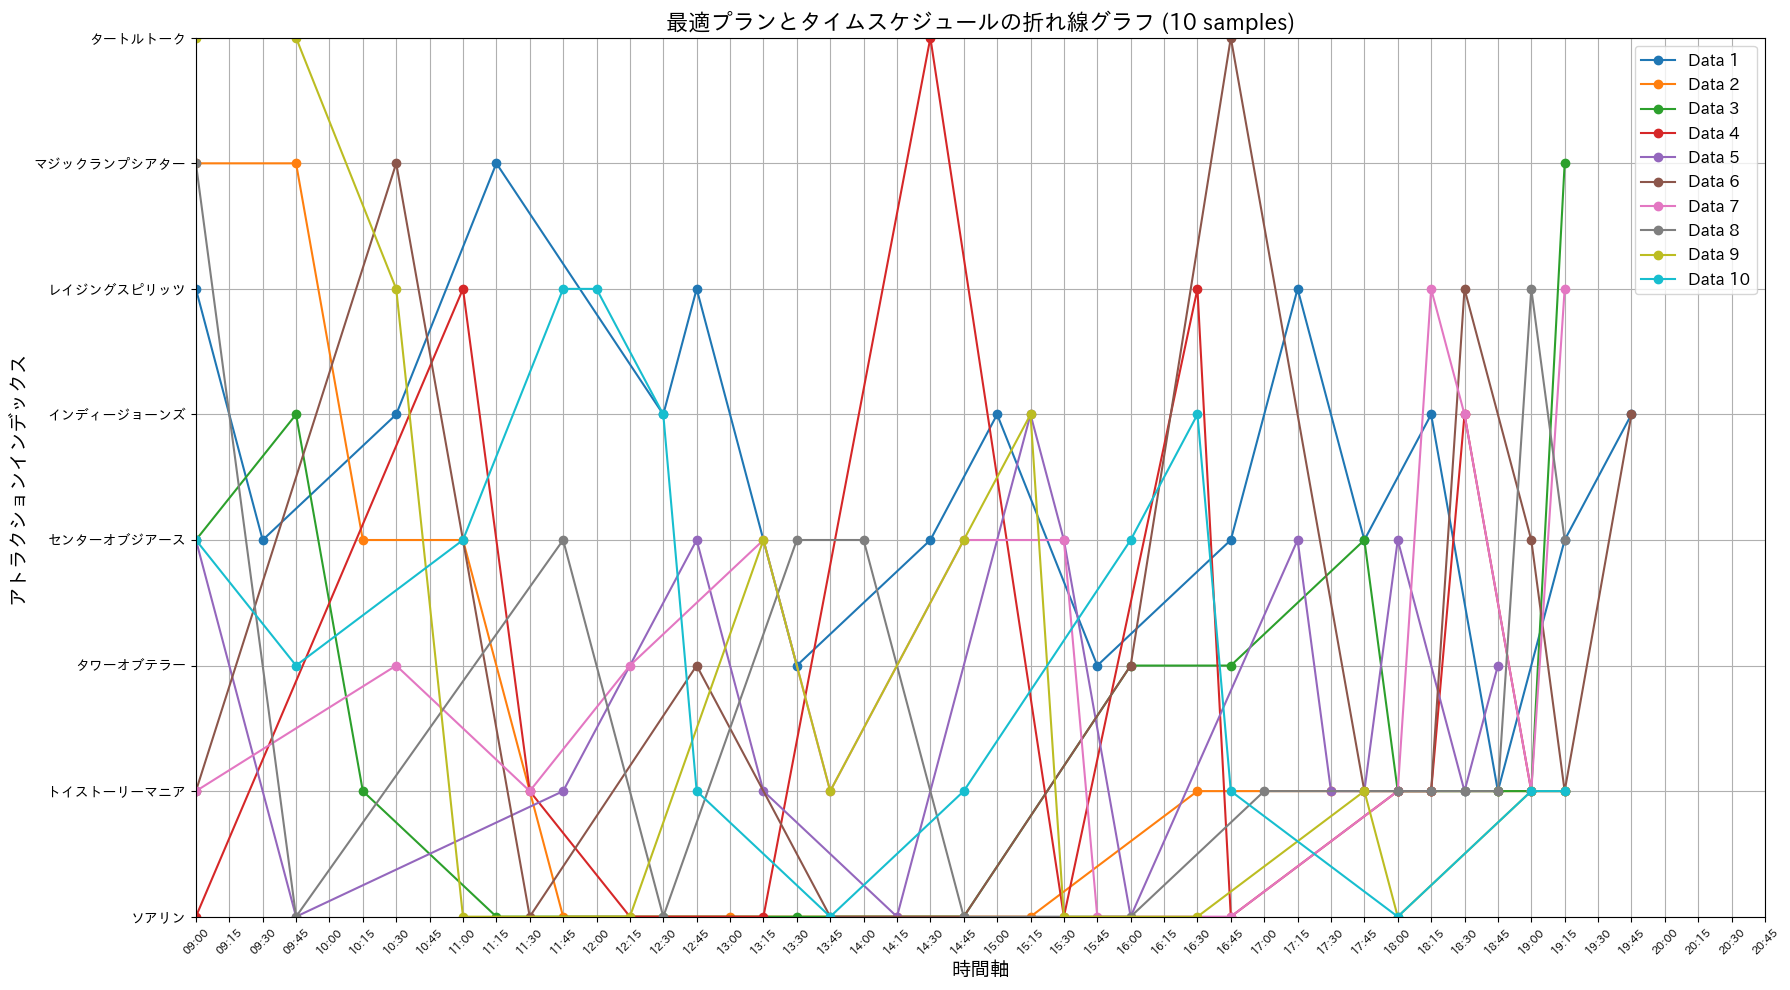

In [9]:
# 関数の呼び出し
csv_file = file  # 適切なファイルパスに変更する
plot_time_schedule(csv_file, num_samples=10)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_time_schedule(csv_file, num_samples=10):
    # CSVファイルからデータを読み込む
    df = pd.read_csv(csv_file)

    # 最初の num_samples 個のデータのみを抽出
    df_sample = df.head(num_samples)

    # "最適プラン"　と　"タイムスケジュール" colのデータを取得
    optimal_plans_list = [eval(plan) for plan in df_sample["最適プラン"]]
    time_schedule_list = [eval(plan) for plan in df_sample["タイムスケジュール"]]

    # カラーマップを定義
    num_colors = len(optimal_plans_list)
    colors = plt.cm.get_cmap('tab10', num_colors)

    # プロットの準備
    plt.figure(figsize=(18, 10))  # グラフのサイズを広く設定

    # optimal_plans_list と time_schedule_list のデータをプロット
    for i in range(len(optimal_plans_list)):
        plt.plot(time_schedule_list[i], optimal_plans_list[i], marker='o', linestyle='-', 
                 label=f'Data {i+1}', color=colors(i))

    # グラフの設定
    plt.xlabel('時間軸', fontsize=14)
    plt.ylabel('アトラクションインデックス', fontsize=14)
    plt.title(f'最適プランのタイムスケジュール ({num_samples} samples)', fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)

    # x軸の範囲を調整（必要に応じて）
    plt.xlim(0, 705)  # 例として幅を広く設定

    # y軸の範囲を調整（必要に応じて）
    plt.ylim(0, 7)
    plt.yticks(range(8), [attractions[i] for i in range(8)], fontsize=10)

    # x軸にアトラクションの名称を設定
    x_ticks = range(0, 706, 15)
    x_labels = [f'{calculate_time(tick)}' for tick in x_ticks]
    plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)
    
    # グラフの表示
    plt.tight_layout()
    plt.show()

### 各最適プランの類似度をヒートマップに表示

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def plot_heatmap(csv_file, num_samples=10):
    # CSVファイルを読み込む
    df = pd.read_csv(csv_file)

    # 最初の num_samples 個のデータのみを抽出
    df_sample = df.head(num_samples)

    # "最適プラン" colのデータを取得
    optimal_plans = df_sample["最適プラン"]

    # 各行の "最適プラン" をリストとして展開
    optimal_plans_list = [eval(plan) for plan in optimal_plans]

    # 最大長を取得
    max_length = max(len(plan) for plan in optimal_plans_list)

    # リストの長さを揃える（短いリストは8で埋める）
    padded_plans = [plan + [8] * (max_length - len(plan)) for plan in optimal_plans_list]

    # コサイン類似度を計算
    similarity_matrix = cosine_similarity(padded_plans)

    # ヒートマップをプロット
    plt.figure(figsize=(45, 36))  # グラフのサイズを適宜調整
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm',
                xticklabels=[f'Plan {i+1}' for i in range(num_samples)],
                yticklabels=[f'Plan {i+1}' for i in range(num_samples)])

    plt.title(f'Similarity Heatmap of Optimal Plans ({num_samples} samples)')
    plt.show()

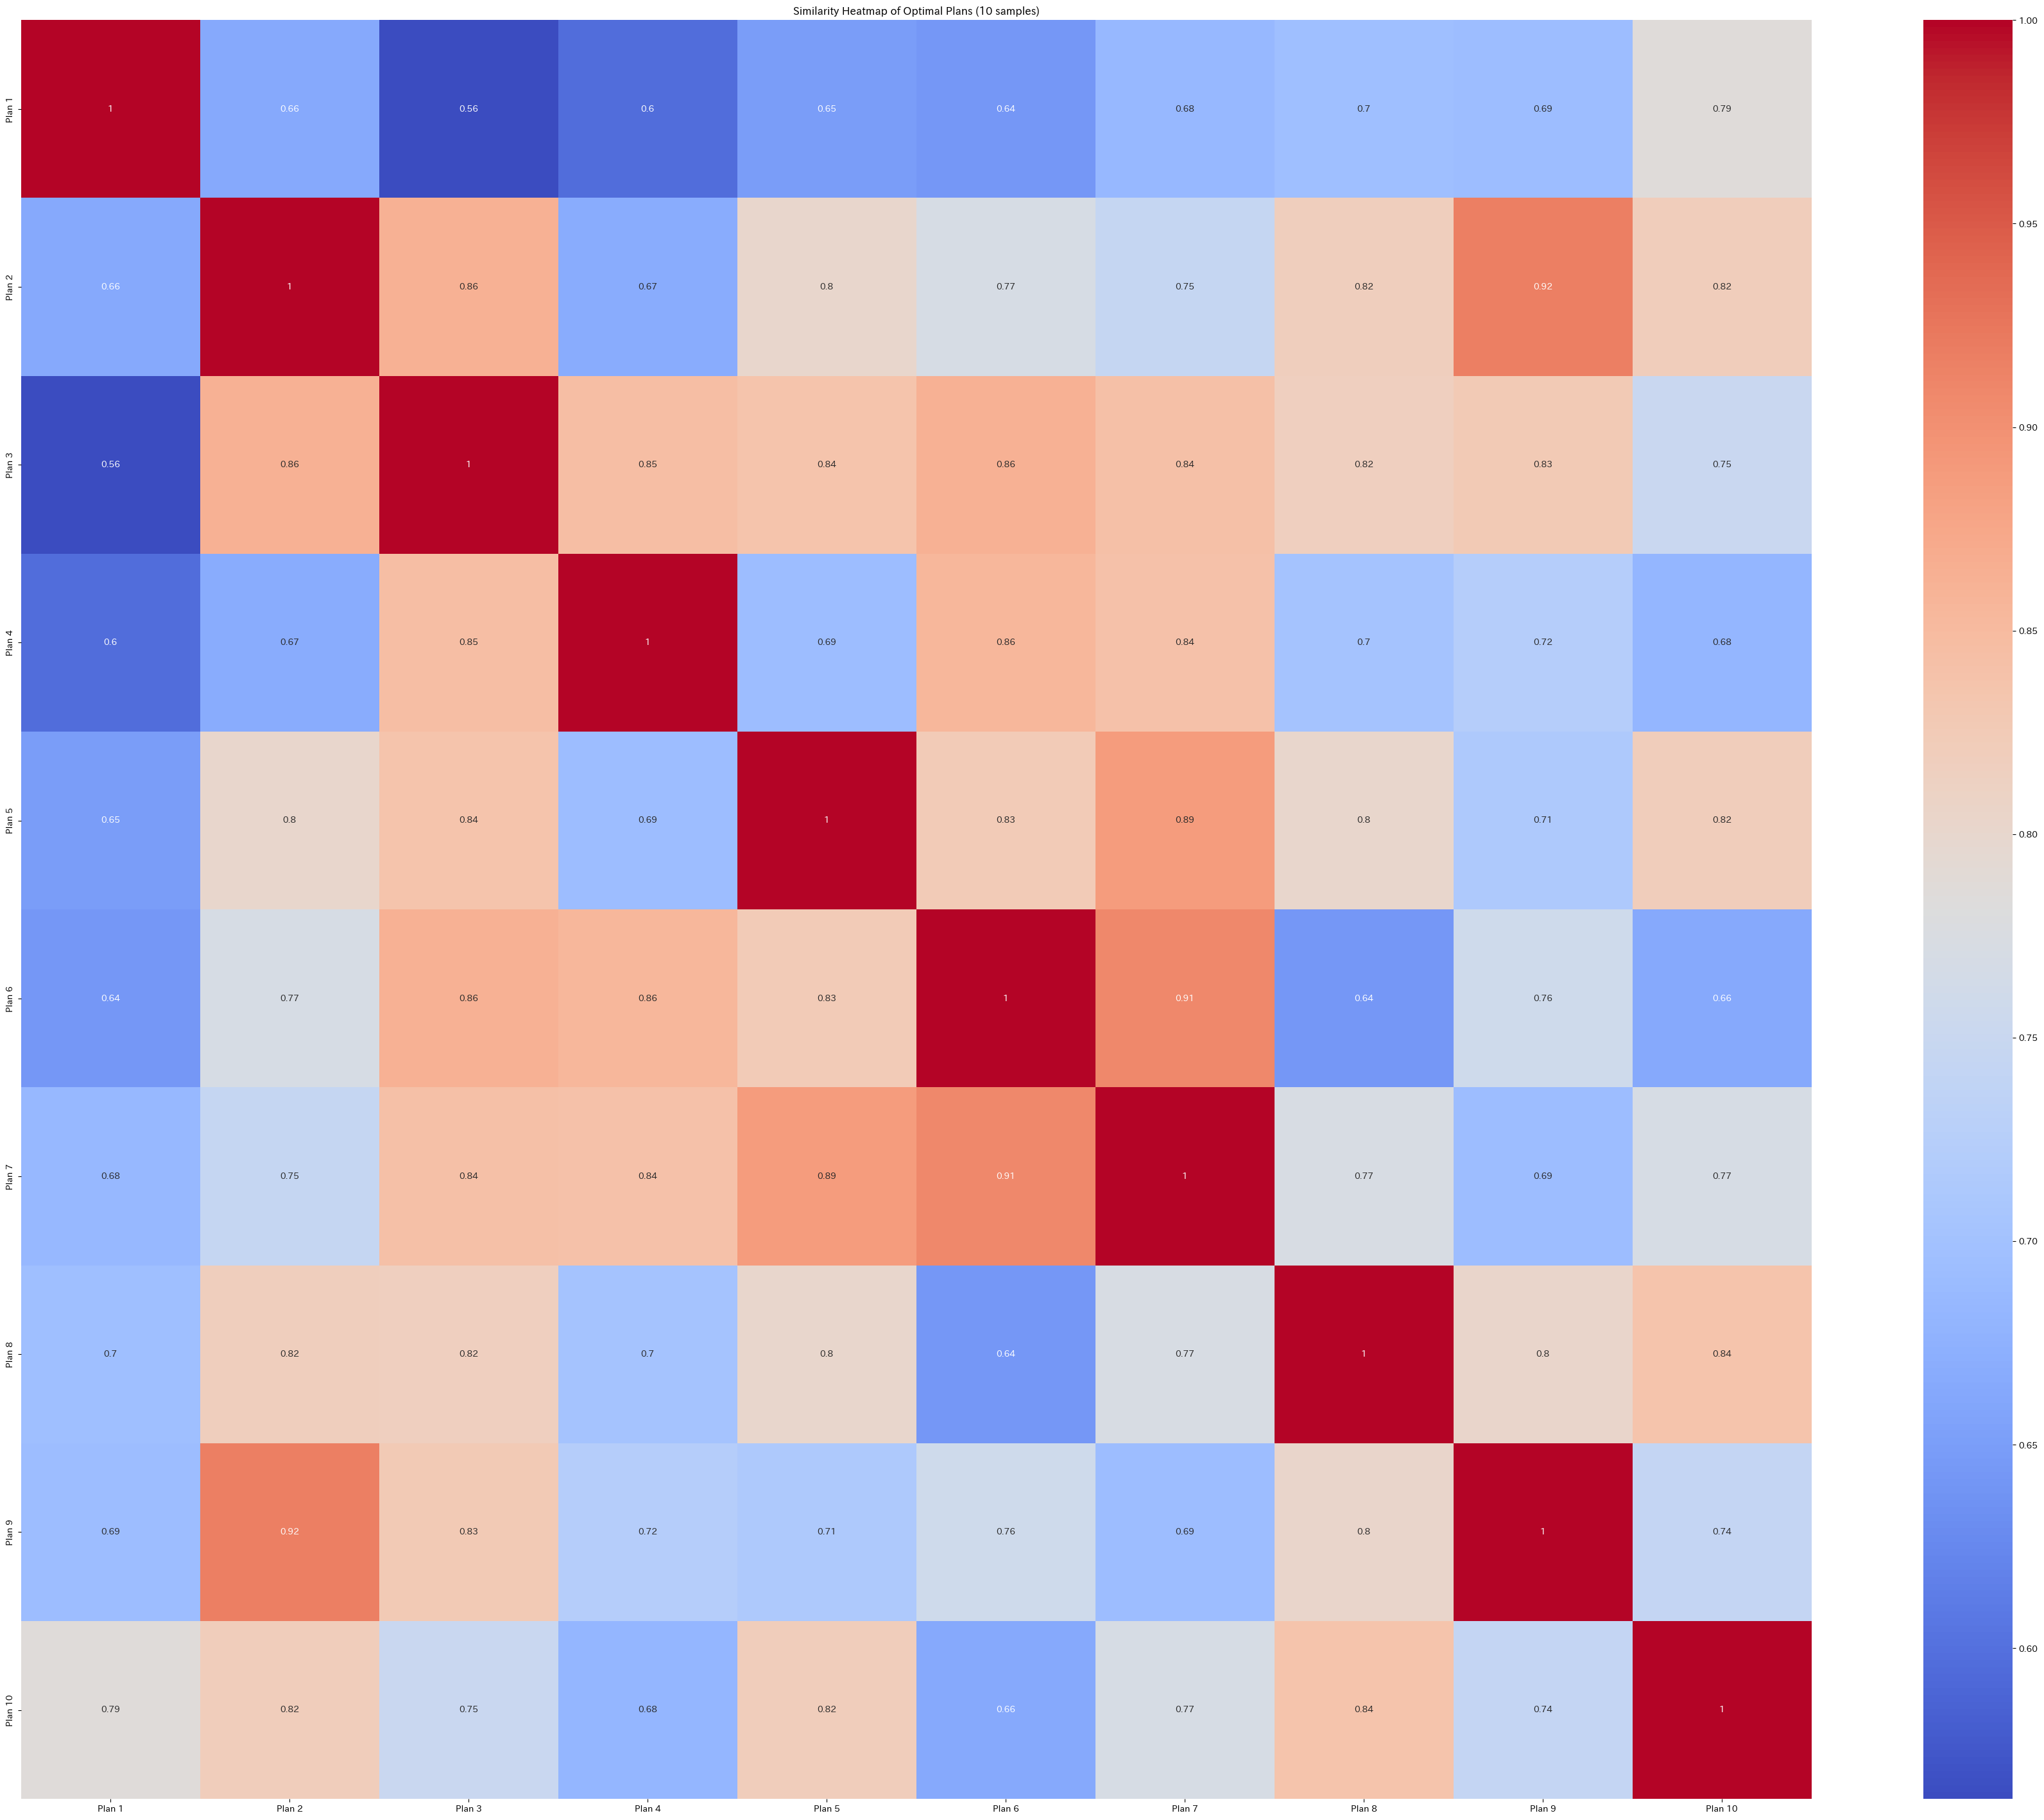

In [92]:
# 関数の呼び出し
csv_file = file
plot_heatmap(csv_file, num_samples=10)

### 最適化されたプランの中で類似度が高いプランをそれぞれ表示

In [93]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import ast

def find_similar_pairs(csv_file, num_samples=10, similarity_threshold=0.9):
    # CSVファイルを読み込む
    df = pd.read_csv(csv_file)

    # 最初の num_samples 個のデータのみを抽出
    df_sample = df.head(num_samples)

    # "最適プラン" colのデータを取得
    optimal_plans = df_sample["最適プラン"]

    # 各行の "最適プラン" をリストとして展開
    optimal_plans_list = [ast.literal_eval(plan) for plan in optimal_plans]

    # 最大長を取得
    max_length = max(len(plan) for plan in optimal_plans_list)

    # リストの長さを揃える（短いリストは0で埋める）
    padded_plans = [plan + [0] * (max_length - len(plan)) for plan in optimal_plans_list]

    # コサイン類似度を計算
    similarity_matrix = cosine_similarity(padded_plans)

    # 類似度の閾値を超えるペアを抽出
    similar_pairs = []
    for i in range(num_samples):
        for j in range(i + 1, num_samples):
            if similarity_matrix[i, j] >= similarity_threshold:
                similar_pairs.append((i+1, j+1, similarity_matrix[i, j]))  # +1 はインデックスを1から始めるため

    # 類似しているペアとその類似度を出力
    if len(similar_pairs) > 0:
        print(f"Similar pairs with similarity >= {similarity_threshold}:")
        for pair in similar_pairs:
            data1 = df_sample.iloc[pair[0] - 1]  # データは1から始まるので、インデックス調整が必要
            data2 = df_sample.iloc[pair[1] - 1]
            print(f"Data {pair[0]} and Data {pair[1]} with similarity: {pair[2]:.2f}")
            
            # 各要素を取得1
            data1 = [data1[0]] + [ast.literal_eval(item) if isinstance(item, str) else item for item in data1[1:]]
            date1 = data1[0]
            total_popularity1 = data1[1]
            total_time1 = data1[2]
            ride_lst1 = data1[3]
            new_ride_lst1 = data1[4]
            ride_time1 = data1[5]
            
            # 各要素を取得2
            data2 = [data2[0]] + [ast.literal_eval(item) if isinstance(item, str) else item for item in data2[1:]]
            date2 = data2[0]
            total_popularity2 = data2[1]
            total_time2 = data2[2]
            ride_lst2 = data2[3]
            new_ride_lst2 = data2[4]
            ride_time2 = data2[5]
            
            # ride_printerで表示
            ride_printer(date1, total_popularity1, total_time1, ride_lst1, new_ride_lst1, ride_time1)
            ride_printer(date2, total_popularity2, total_time2, ride_lst2, new_ride_lst2, ride_time2)
            print()
    else:
        print("No similar pairs found with the given similarity threshold.")

In [94]:
# 関数の呼び出し
csv_file = file
find_similar_pairs(csv_file, num_samples=10, similarity_threshold=0.90)

No similar pairs found with the given similarity threshold.
